# Importando bibliotecas

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Pre processamento
Como nosso dataset veio sem valores faltantes e todas as features vieram em um formato adequeado, nessa etapa vamos usar apenas o balanceamento entre classes.

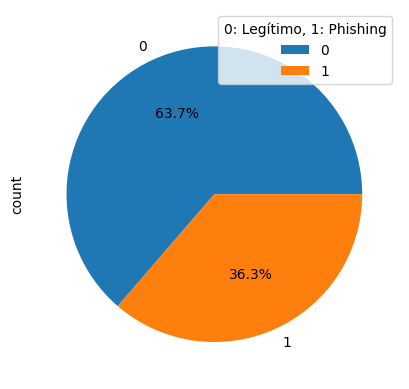

In [20]:
df = pd.read_csv('assets/data/web-page-phishing.csv')
df["phishing"].value_counts().plot(kind='pie', autopct='%1.1f%%').legend(labels=df["phishing"].value_counts().index, title="0: Legítimo, 1: Phishing", loc="upper right")

In [21]:
X, y = df.drop(columns=['phishing']), df['phishing']

# Treinamento e avaliação

In [25]:
def evaluate(X,y,model, metrics):
    scores = cross_val_score(model, X, y, cv=5, scoring=metrics)
    return np.mean(scores), np.std(scores)

<table>
  <thead>
    <tr>
      <th>Método</th>
      <th>Acurácia</th>
      <th>Precisão</th>
      <th>Revocação</th>
      <th>F1</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>KNeighborsClassifier</td>
      <td>0.87 ± 0.06</td>
      <td>0.82 ± 0.09</td>
      <td>0.83 ± 0.06</td>
      <td>0.82 ± 0.07</td>
    </tr>
    <tr>
      <td>RandomForestClassifier</td>
      <td>0.84 ± 0.06</td>
      <td>0.85 ± 0.04</td>
      <td>0.68 ± 0.16</td>
      <td>0.74 ± 0.13</td>
    </tr>
    <tr>
      <td>GradientBoostingClassifier</td>
      <td>0.87 ± 0.07</td>
      <td>0.81 ± 0.08</td>
      <td>0.83 ± 0.11</td>
      <td>0.82 ± 0.10</td>
    </tr>
    <tr>
      <td>SVC</td>
      <td>0.87 ± 0.06</td>
      <td>0.83 ± 0.09</td>
      <td>0.81 ± 0.08</td>
      <td>0.82 ± 0.08</td>
    </tr>
    <tr>
      <td>GaussianNB</td>
      <td>0.71 ± 0.01</td>
      <td>0.89 ± 0.08</td>
      <td>0.25 ± 0.02</td>
      <td>0.39 ± 0.01</td>
    </tr>
  </tbody>
</table>
<p>Métricas representadas por média +- desvio padrão </p>

## Instanciando e avaliando classificadores

In [ ]:
metrics = ['accuracy', 'precision', 'recall', 'f1']

knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(max_depth=2, random_state=42)
gb = GradientBoostingClassifier()
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
gnb = GaussianNB()
classifiers = [knn, rf, gb, svc, gnb]
for classifier in classifiers:
    print(f'\nAvaliação do classificador: {classifier.__class__.__name__}')
    for metric in metrics:
        mean, std = evaluate(X, y, classifier, metric)
        print(f'{metric}: {mean:.2f} ± {std:.2f}')